**Import Libaries and data**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob

df = pd.read_csv('netflix_titles.csv')


**Checking number of rows and columns in data**

In [ ]:
df.shape

(8807, 12)

**Checking content available in Dataset**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


**How to check columns name of dataset**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Taking the count of ratings available**

In [ ]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


**Creating the Piechart based on Content rating**

In [ ]:
pieChart = px.pie(x, values='counts', names='rating',title='Distribution of content ratings on Netflix')
pieChart.show()

In [ ]:
type_count = df.groupby('type').size().reset_index(name='count')
fig1 = px.pie(type_count, values='count', names='type', title='Content Type Distribution (Movies vs TV Shows)')
fig1.show()

**Analyzing the top 5 Directors on Netflix**

In [ ]:
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
directors_list = df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [ ]:
directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [ ]:
directors = directors[directors.Director != 'Director not specified']

In [ ]:
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [ ]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

                 Director  Total Count
4021        Rajiv Chilaka           22
4068          Raúl Campos           18
261             Jan Suter           18
3236         Marcus Raboy           16
4652          Suhas Kadav           16
...                   ...          ...
2331  Ivan Andrew Payawal            1
610    Songyos Sugmakanan            1
611          Sonia Dauger            1
612        Sophie Sartain            1
2336           Ivona Juka            1

[5120 rows x 2 columns]


In [ ]:
top5Directors = directors.head()
print(top5Directors)

           Director  Total Count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
3236   Marcus Raboy           16
4652    Suhas Kadav           16


In [ ]:
genre_series = df['listed_in'].str.split(',').explode().str.strip()
genre_count = genre_series.value_counts().reset_index()
genre_count.columns = ['genre', 'count']
top_10_genres = genre_count.head(10)
fig2 = px.bar(top_10_genres, x='count', y='genre', orientation='h', title='Top 10 Netflix Genres')
fig2.show()

In [ ]:
country_series = df['country'].str.split(',').explode().str.strip()
country_count = country_series.value_counts().reset_index()
country_count.columns = ['country', 'count']
top_10_countries = country_count.head(10)
fig3 = px.bar(top_10_countries, x='count', y='country', orientation='h', title='Top 10 Countries by Content Availability')
fig3.show()


In [ ]:
top5Directors = top5Directors.sort_values(by=['Total Count'])
barChart = px.bar(top5Directors, x='Total Count', y = 'Director', title = 'Top 5 Directors on Netflix')
barChart.show()

**Analyzing the top 5 Actors on Netflix**

In [ ]:
df['cast']=df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name= 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart2.show()


**Analyzing the content produced on netflix based on years**

In [ ]:
df1 = df[['type','release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [ ]:
print(df2)

     Release Year     Type  Total Count
0            1925  TV Show            1
1            1942    Movie            2
2            1943    Movie            3
3            1944    Movie            3
4            1945    Movie            3
..            ...      ...          ...
114          2019  TV Show          397
115          2020    Movie          517
116          2020  TV Show          436
117          2021    Movie          277
118          2021  TV Show          315

[119 rows x 3 columns]


In [ ]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netflix Every Year")
graph.show()

**Sentiment Analysis of Netflix Content**

In [ ]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {"release_year":'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')
df3 = df3[df3['Release Year']>2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix")
barGraph.show()

In [ ]:
release_rating_counts = df.groupby(['release_year', 'rating']).size().reset_index(name='count')
pivot_rr = release_rating_counts.pivot(index='release_year', columns='rating', values='count').fillna(0)
import plotly.figure_factory as ff
fig3 = ff.create_annotated_heatmap(
    z=pivot_rr.values,
    x=list(pivot_rr.columns),
    y=list(pivot_rr.index),
    colorscale='Viridis',
    showscale=True,
    annotation_text=pivot_rr.values.astype(int)
)
fig3.update_layout(title_text='Heatmap: Content Release Count by Year and Rating')
fig3.show()

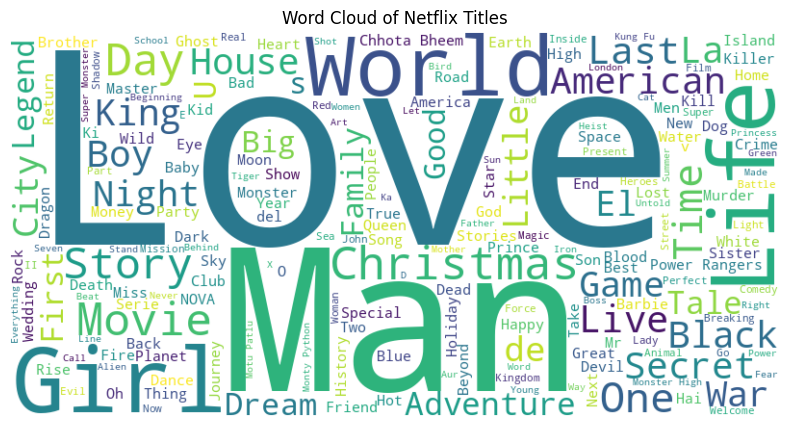

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_text = ' '.join(df['title'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df_date = df.dropna(subset=['date_added'])
df_date['year_added'] = df_date['date_added'].dt.year
added_per_year = df_date.groupby('year_added').size().reset_index(name='count')

fig4 = px.bar(added_per_year, x='year_added', y='count', title='Number of Contents Added per Year to Netflix')
fig4.show()


In [ ]:
def extract_duration(x):
    if pd.isna(x):
        return None, None
    parts = x.split(' ')
    if len(parts) == 2 and parts[0].isdigit():
        return int(parts[0]), parts[1]
    return None, None

df['duration_num'], df['duration_unit'] = zip(*df['duration'].apply(extract_duration))


In [ ]:
movies_duration = df[df['type'] == 'Movie']['duration_num'].dropna()
tv_seasons = df[df['type'] == 'TV Show']['duration_num'].dropna()

fig5a = px.histogram(movies_duration, nbins=30, title='Distribution of Movie Durations (minutes)', labels={'value':'Duration (min)'})
fig5a.show()

fig5b = px.histogram(tv_seasons, nbins=10, title='Distribution of TV Show Seasons', labels={'value':'Number of Seasons'})
fig5b.show()